Load necessary packages

In [1]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cmocean

plt.style.use("thesis")

Define annotation functions

In [2]:
def anno_tl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (l, t), xytext=(3, -3), textcoords="offset points", ha='left', va='top')
    return

def anno_bl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (l, b), xytext=(3, 3), textcoords="offset points", ha='left', va='bottom')
    return

Read in coarse time series from APE files

In [3]:
with h5py.File("gkb_stats/U1/APE.h5","r") as f:
    tiiU1 = f["tii"][()]
with h5py.File("gkb_stats/U2/APE.h5","r") as f:
    tiiU2 = f["tii"][()]
with h5py.File("gkb_stats/U3/APE.h5","r") as f:
    tiiU3 = f["tii"][()]
with h5py.File("gkb_stats/U4/APE.h5","r") as f:
    tiiU4 = f["tii"][()]
with h5py.File("gkb_stats/F1/APE.h5","r") as f:
    tiiF1 = f["tii"][()]
with h5py.File("gkb_stats/F2/APE.h5","r") as f:
    tiiF2 = f["tii"][()]
with h5py.File("gkb_stats/F3/APE.h5","r") as f:
    tiiF3 = f["tii"][()]

Read in time series of $\overline{\varepsilon}$, $\varepsilon^\prime$, and $\chi$

In [4]:
# t = time, e = epsilon, c = chi
# M = mean, P = perturbation, T = total

with h5py.File("gkb_stats/U1/budgets.h5","r") as f:
    tU1 = f["t"][()]
    eMU1 = f["epsM"][()]
    ePU1 = f["epsP"][()]
    cTU1 = f["chiM"][()] + f["chiP"][()]
eTU1 = eMU1 + ePU1

with h5py.File("gkb_stats/U2/budgets.h5","r") as f:
    tU2 = f["t"][()]
    eMU2 = f["epsM"][()]
    ePU2 = f["epsP"][()]
    cTU2 = f["chiM"][()] + f["chiP"][()]
eTU2 = eMU2 + ePU2

with h5py.File("gkb_stats/U3/budgets.h5","r") as f:
    tU3 = f["t"][()]
    eMU3 = f["epsM"][()]
    ePU3 = f["epsP"][()]
    cTU3 = f["chiM"][()] + f["chiP"][()]
eTU3 = eMU3 + ePU3

with h5py.File("gkb_stats/U4/budgets.h5","r") as f:
    tU4 = f["t"][()]
    eMU4 = f["epsM"][()]
    ePU4 = f["epsP"][()]
    cTU4 = f["chiM"][()] + f["chiP"][()]
eTU4 = eMU4 + ePU4

with h5py.File("gkb_stats/F1/budgets.h5","r") as f:
    tF1 = f["t"][()]
    eMF1 = f["epsM"][()]
    ePF1 = f["epsP"][()]
    cTF1 = f["chiM"][()] + f["chiP"][()]
eTF1 = eMF1 + ePF1

with h5py.File("gkb_stats/F2/budgets.h5","r") as f:
    tF2 = f["t"][()]
    eMF2 = f["epsM"][()]
    ePF2 = f["epsP"][()]
    cTF2 = f["chiM"][()] + f["chiP"][()]
eTF2 = eMF2 + ePF2

with h5py.File("gkb_stats/F3/budgets.h5","r") as f:
    tF3 = f["t"][()]
    eMF3 = f["epsM"][()]
    ePF3 = f["epsP"][()]
    cTF3 = f["chiM"][()] + f["chiP"][()]
eTF3 = eMF3 + ePF3

Numerically integrate $\chi$ time series

In [5]:
# cc = cumulative chi
ccU1 = np.zeros(cTU1.size)
for i in range(tU1.size):
    ccU1[i] = np.trapz(cTU1[:i+1], x=tU1[:i+1])

ccU2 = np.zeros(cTU2.size)
for i in range(tU2.size):
    ccU2[i] = np.trapz(cTU2[:i+1], x=tU2[:i+1])
    
ccU3 = np.zeros(cTU3.size)
for i in range(tU3.size):
    ccU3[i] = np.trapz(cTU3[:i+1], x=tU3[:i+1])
    
ccU4 = np.zeros(cTU4.size)
for i in range(tU4.size):
    ccU4[i] = np.trapz(cTU4[:i+1], x=tU4[:i+1])
    
N1 = np.nonzero(tF1==tiiF1[0])[0][0]
ccF1 = np.zeros(cTF1[N1:].size)
for i in range(tF1[N1:].size):
    ccF1[i] = np.trapz(cTF1[N1:N1+i+1], x=tF1[N1:N1+i+1])

N2 = np.nonzero(tF2==tiiF2[0])[0][0]
ccF2 = np.zeros(cTF2[N2:].size)
for i in range(tF2[N2:].size):
    ccF2[i] = np.trapz(cTF2[N2:N2+i+1], x=tF2[N2:N2+i+1])
    
N3 = np.nonzero(tF3==tiiF3[0])[0][0]
ccF3 = np.zeros(cTF3[N3:].size)
for i in range(tF3[N3:].size):
    ccF3[i] = np.trapz(cTF3[N3:N3+i+1], x=tF3[N3:N3+i+1])

Integrate TKE dissipation time series

In [6]:
# ec = cumulative epsilon
ecPU1, ecTU1 = np.zeros(tU1.size), np.zeros(tU1.size)
for i in range(tU1.size):
    ecPU1[i] = np.trapz(ePU1[:i+1], x=tU1[:i+1])
    ecTU1[i] = np.trapz(eTU1[:i+1], x=tU1[:i+1])
    
ecPU2, ecTU2 = np.zeros(tU2.size), np.zeros(tU2.size)
for i in range(tU2.size):
    ecPU2[i] = np.trapz(ePU2[:i+1], x=tU2[:i+1])
    ecTU2[i] = np.trapz(eTU2[:i+1], x=tU2[:i+1])
    
ecPU3, ecTU3 = np.zeros(tU3.size), np.zeros(tU3.size)
for i in range(tU3.size):
    ecPU3[i] = np.trapz(ePU3[:i+1], x=tU3[:i+1])
    ecTU3[i] = np.trapz(eTU3[:i+1], x=tU3[:i+1])
    
ecPU4, ecTU4 = np.zeros(tU4.size), np.zeros(tU4.size)
for i in range(tU4.size):
    ecPU4[i] = np.trapz(ePU4[:i+1], x=tU4[:i+1])
    ecTU4[i] = np.trapz(eTU4[:i+1], x=tU4[:i+1])
    
N1 = np.nonzero(tF1==tiiF1[0])[0][0]
# N1 = np.nonzero(tF1>55)[0][0]
ecPF1, ecTF1 = np.zeros(tF1[N1:].size), np.zeros(tF1[N1:].size)
for i in range(tF1[N1:].size):
    ecPF1[i] = np.trapz(ePF1[N1:N1+i+1], x=tF1[N1:N1+i+1])
    ecTF1[i] = np.trapz(eTF1[N1:N1+i+1], x=tF1[N1:N1+i+1])
    
N2 = np.nonzero(tF2==tiiF2[0])[0][0]
ecPF2, ecTF2 = np.zeros(tF2[N2:].size), np.zeros(tF2[N2:].size)
for i in range(tF2[N2:].size):
    ecPF2[i] = np.trapz(ePF2[N2:N2+i+1], x=tF2[N2:N2+i+1])
    ecTF2[i] = np.trapz(eTF2[N2:N2+i+1], x=tF2[N2:N2+i+1])
    
N3 = np.nonzero(tF3==tiiF3[0])[0][0]
# N3 = np.nonzero(tF3>55)[0][0]
ecPF3, ecTF3 = np.zeros(tF3[N3:].size), np.zeros(tF3[N3:].size)
for i in range(tF3[N3:].size):
    ecPF3[i] = np.trapz(ePF3[N3:N3+i+1], x=tF3[N3:N3+i+1])
    ecTF3[i] = np.trapz(eTF3[N3:N3+i+1], x=tF3[N3:N3+i+1])

Compute instantaneous mixing efficiencies $\eta$ and $\eta^\prime$

In [7]:
# fP = efficiency perturbation, fT = efficiency total
fPU1, fTU1 = cTU1/(cTU1+ePU1), cTU1/(cTU1+eTU1)
fPU2, fTU2 = cTU2/(cTU2+ePU2), cTU2/(cTU2+eTU2)
fPU3, fTU3 = cTU3/(cTU3+ePU3), cTU3/(cTU3+eTU3)
fPU4, fTU4 = cTU4/(cTU4+ePU4), cTU4/(cTU4+eTU4)
fPF1, fTF1 = cTF1/(cTF1+ePF1), cTF1/(cTF1+eTF1)
fPF2, fTF2 = cTF2/(cTF2+ePF2), cTF2/(cTF2+eTF2)
fPF3, fTF3 = cTF3/(cTF3+ePF3), cTF3/(cTF3+eTF3)

Compute cumulative mixing efficiencies

In [8]:
# fc = cumulative efficiency
fcPU1, fcTU1 = np.zeros(ccU1.size), np.zeros(ccU1.size)
fcPU2, fcTU2 = np.zeros(ccU2.size), np.zeros(ccU2.size)
fcPU3, fcTU3 = np.zeros(ccU3.size), np.zeros(ccU3.size)
fcPU4, fcTU4 = np.zeros(ccU4.size), np.zeros(ccU4.size)
fcPU1[0], fcTU1[0] = fPU1[0], fTU1[0]
fcPU2[0], fcTU2[0] = fPU2[0], fTU2[0]
fcPU3[0], fcTU3[0] = fPU3[0], fTU3[0]
fcPU4[0], fcTU4[0] = fPU4[0], fTU4[0]
fcPU1[1:], fcTU1[1:] = ccU1[1:]/(ccU1[1:]+ecPU1[1:]), ccU1[1:]/(ccU1[1:]+ecTU1[1:])
fcPU2[1:], fcTU2[1:] = ccU2[1:]/(ccU2[1:]+ecPU2[1:]), ccU2[1:]/(ccU2[1:]+ecTU2[1:])
fcPU3[1:], fcTU3[1:] = ccU3[1:]/(ccU3[1:]+ecPU3[1:]), ccU3[1:]/(ccU3[1:]+ecTU3[1:])
fcPU4[1:], fcTU4[1:] = ccU4[1:]/(ccU4[1:]+ecPU4[1:]), ccU4[1:]/(ccU4[1:]+ecTU4[1:])

fcPF1, fcTF1 = np.zeros(ccF1.size), np.zeros(ccF1.size)
fcPF2, fcTF2 = np.zeros(ccF2.size), np.zeros(ccF2.size)
fcPF3, fcTF3 = np.zeros(ccF3.size), np.zeros(ccF3.size)
fcPF1[0], fcTF1[0] = fPF1[N1], fTF1[N1]
fcPF2[0], fcTF2[0] = fPF2[N2], fTF2[N2]
fcPF3[0], fcTF3[0] = fPF3[N3], fTF3[N3]
fcPF1[1:], fcTF1[1:] = ccF1[1:]/(ccF1[1:]+ecPF1[1:]), ccF1[1:]/(ccF1[1:]+ecTF1[1:])
fcPF2[1:], fcTF2[1:] = ccF2[1:]/(ccF2[1:]+ecPF2[1:]), ccF2[1:]/(ccF2[1:]+ecTF2[1:])
fcPF3[1:], fcTF3[1:] = ccF3[1:]/(ccF3[1:]+ecPF3[1:]), ccF3[1:]/(ccF3[1:]+ecTF3[1:])

## Plot figure 9

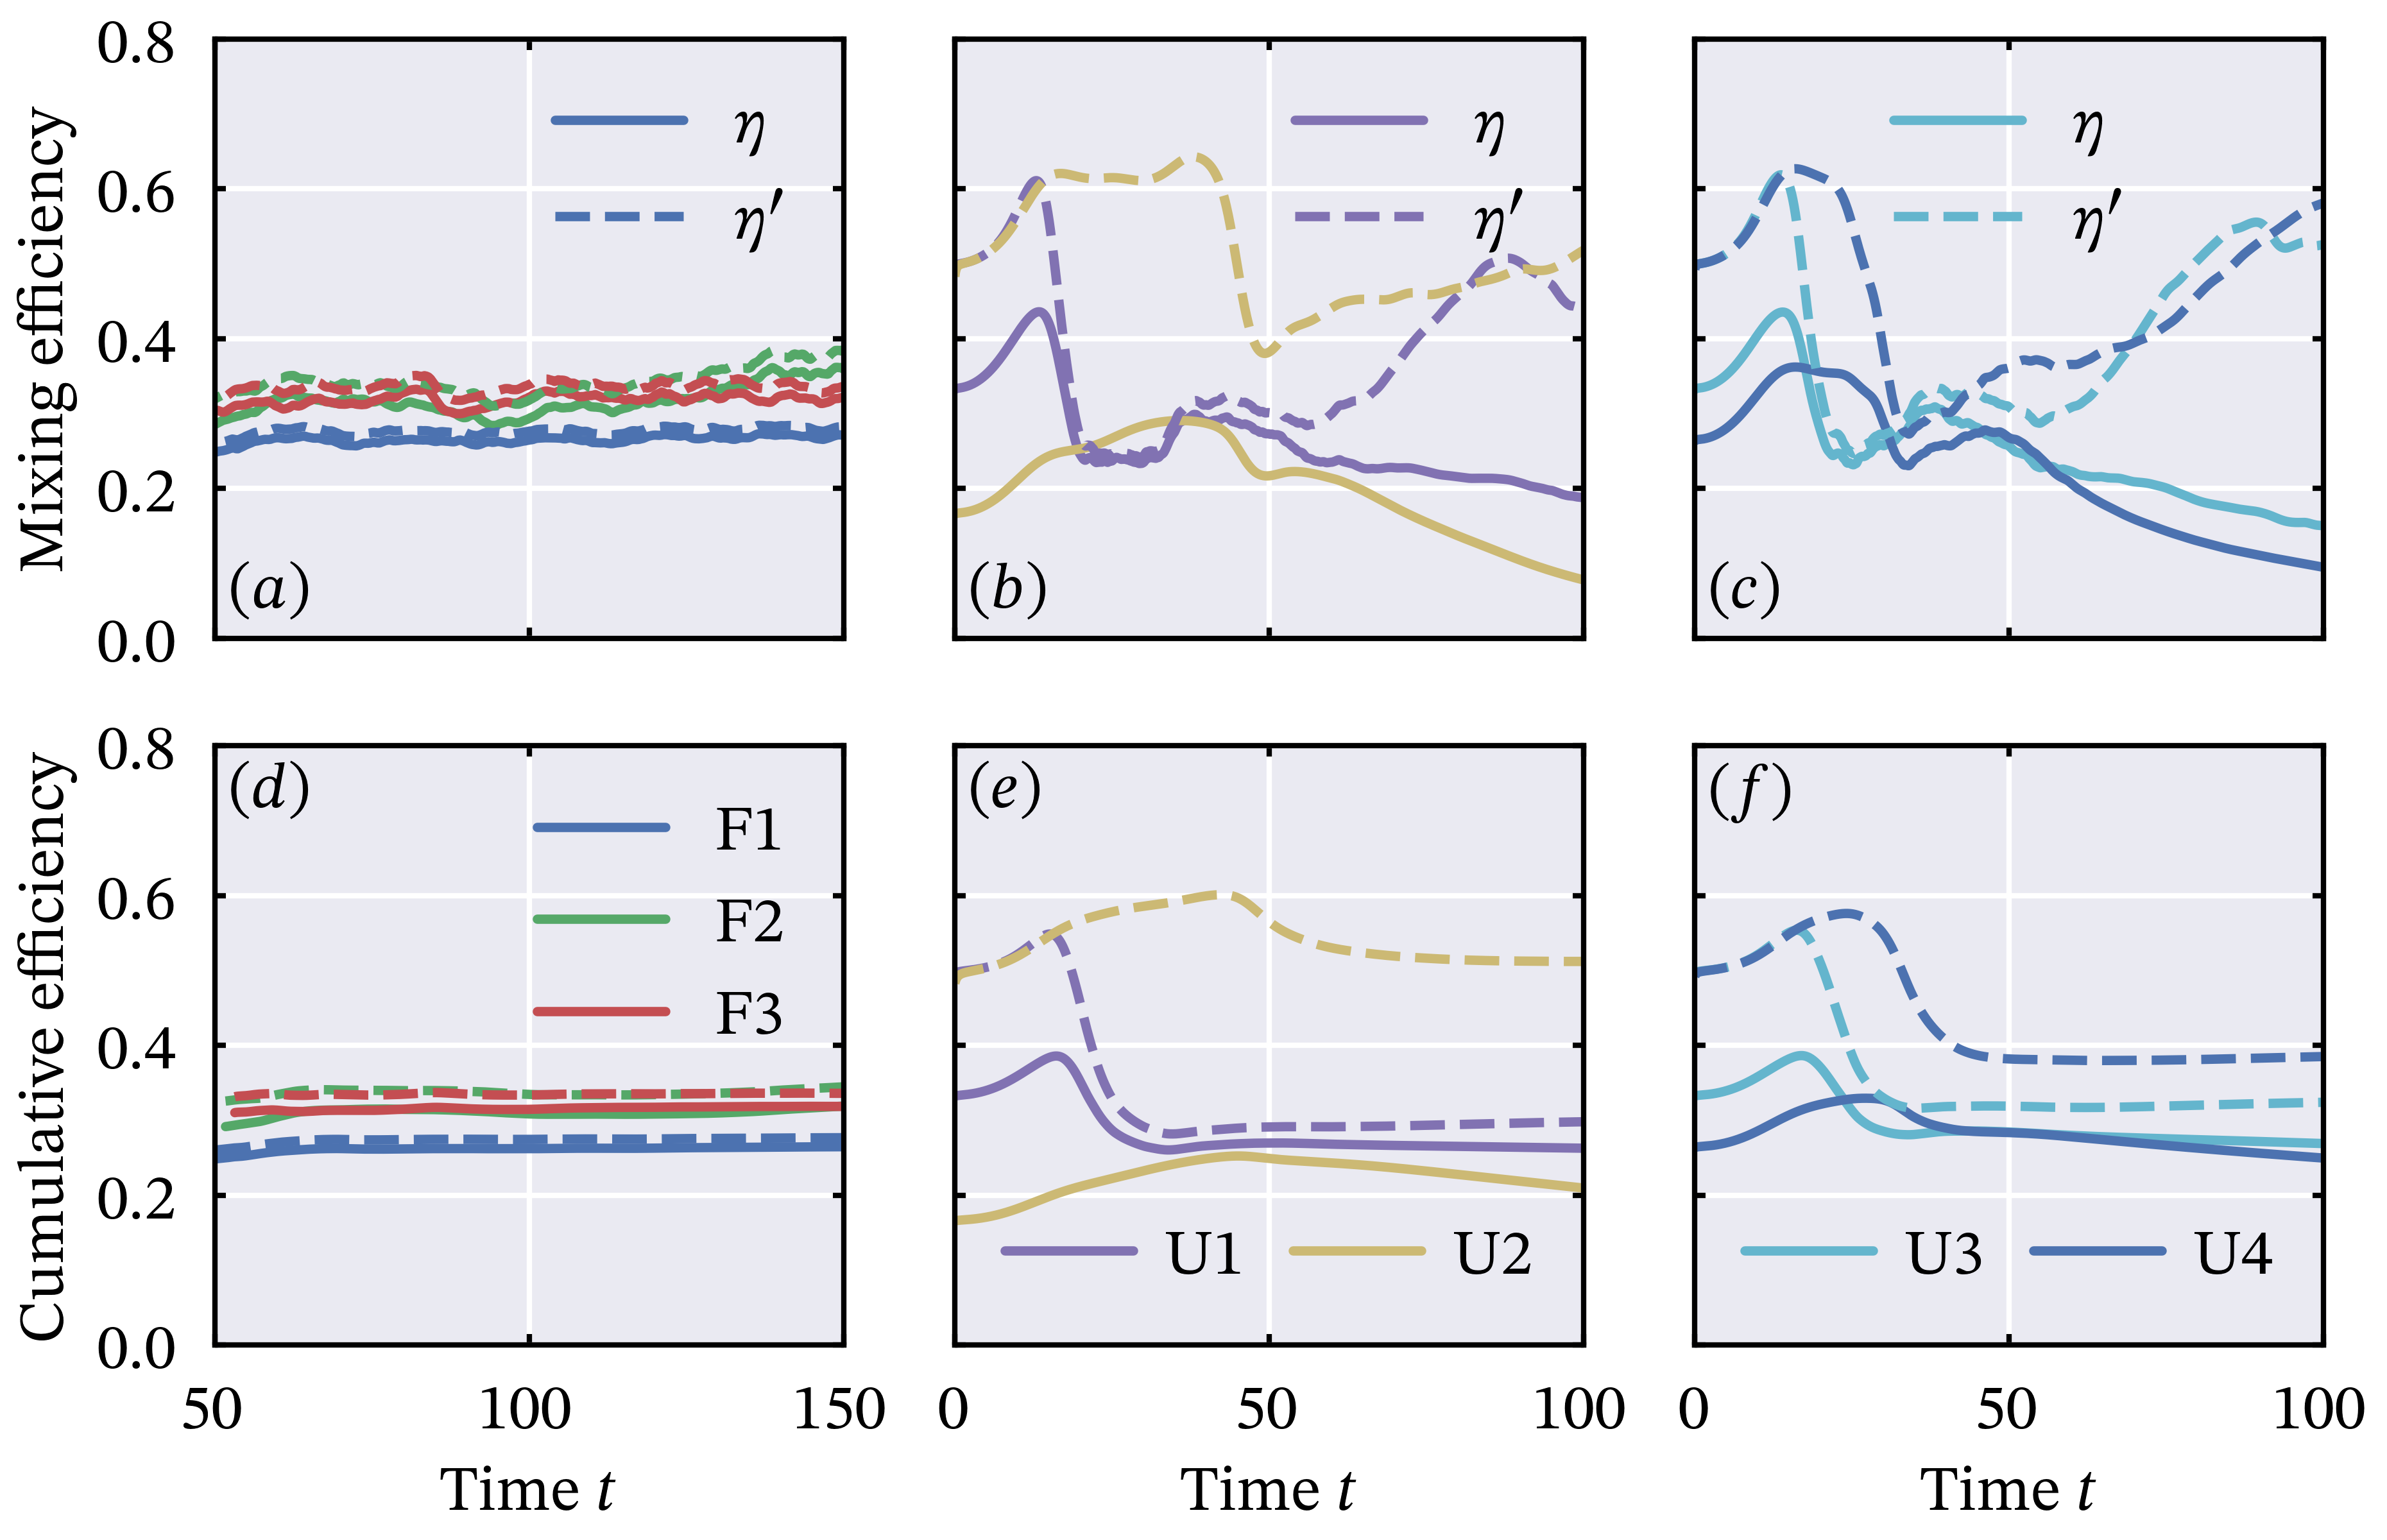

In [9]:
fig, axs = plt.subplots(2,3, sharex='col', sharey='row')#, figsize=(9.0,6.0))

ax=axs[0,0]
ax.plot(tF1, fTF1, label=r"$\eta$", color="C0")
ax.plot(tF2, fTF2, color="C1")
ax.plot(tF3, fTF3, color="C2")
ax.plot(tF1, fPF1,'--', label=r"$\eta^\prime$", color="C0")
ax.plot(tF2, fPF2,'--', color="C1")
ax.plot(tF3, fPF3,'--', color="C2")
ax.legend(ncol=1, loc='upper right')
ax.set(
    xlim=[50,150],
    ylabel="Mixing efficiency",
    ylim=[0,0.8],
)

ax=axs[0,1]
ax.plot(tU1, fTU1, label=r"$\eta$", color="C3")
ax.plot(tU2, fTU2, color="C4")
ax.plot(tU1, fPU1,'--', label=r"$\eta^\prime$", color="C3")
ax.plot(tU2, fPU2,'--', color="C4")
ax.legend(ncol=1, loc='upper right')
ax.set(xlim=[0,100])

ax=axs[0,2]
ax.plot(tU3, fTU3, label=r"$\eta$", color="C5")
ax.plot(tU4, fTU4, color="C6")
ax.plot(tU3, fPU3,'--', label=r"$\eta^\prime$", color="C5")
ax.plot(tU4, fPU4,'--', color="C6")
ax.legend(ncol=1, loc='upper center')
ax.set(xlim=[0,100])

ax=axs[1,0]
# ax.plot(0, 100, label=r"$\ $", alpha=0)
ax.plot(tF1[N1:], fcTF1, label="F1", color="C0")
ax.plot(tF2[N2:], fcTF2, label="F2", color="C1")
ax.plot(tF3[N3:], fcTF3, label="F3", color="C2")
ax.plot(tF1[N1:], fcPF1,'--', color="C0")
ax.plot(tF2[N2:], fcPF2,'--', color="C1")
ax.plot(tF3[N3:], fcPF3,'--', color="C2")
ax.legend(loc='upper right')
ax.set(
    xlabel="Time $t$",
    ylabel=r"Cumulative efficiency",
    ylim=[0,0.8]
)

ax=axs[1,1]
ax.plot(tU1, fcTU1, label="U1", color="C3")
ax.plot(tU2, fcTU2, label="U2", color="C4")
ax.plot(tU1, fcPU1,'--', color="C3")
ax.plot(tU2, fcPU2,'--', color="C4")
ax.legend(ncol=2, loc='lower center', handletextpad=0.5, columnspacing=0.75)
ax.set(
    xlabel="Time $t$"
)

ax=axs[1,2]
ax.plot(tU3, fcTU3, label="U3", color="C5")
ax.plot(tU4, fcTU4, label="U4", color="C6")
ax.plot(tU3, fcPU3,'--', color="C5")
ax.plot(tU4, fcPU4,'--', color="C6")
ax.legend(ncol=2, loc='lower center', handletextpad=0.5, columnspacing=0.75)
ax.set(
    xlabel="Time $t$"
)

anno_bl(axs[0,0], "$(a)$")
anno_bl(axs[0,1], "$(b)$")
anno_bl(axs[0,2], "$(c)$")
anno_tl(axs[1,0], "$(d)$")
anno_tl(axs[1,1], "$(e)$")
anno_tl(axs[1,2], "$(f)$")

# fig.savefig("mean_dissipation.pdf")
# fig.savefig("EPS/mean_dissipation.eps")

plt.show()